# Sales Analysis

#### Import Necessary Libraries

In [1]:
import pandas as pd
import os

### Merge the 12 months of sales data into single CSV file

In [2]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\Sales_Data\\Sales_April_2019.csv")

In [3]:
df1 =pd.concat(map(pd.read_csv,["C:\\Users\\user\\Downloads\\Sales_Data\\Sales_April_2019.csv","C:\\Users\\user\\Downloads\\Sales_Data\\Sales_August_2019.csv","C:\\Users\\user\\Downloads\\Sales_Data\\Sales_December_2019.csv","C:\\Users\\user\\Downloads\\Sales_Data\\Sales_February_2019.csv","C:\\Users\\user\\Downloads\\Sales_Data\\Sales_January_2019.csv","C:\\Users\\user\\Downloads\\Sales_Data\\Sales_July_2019.csv","C:\\Users\\user\\Downloads\\Sales_Data\\Sales_June_2019.csv","C:\\Users\\user\\Downloads\\Sales_Data\\Sales_March_2019.csv","C:\\Users\\user\\Downloads\\Sales_Data\\Sales_May_2019.csv","C:\\Users\\user\\Downloads\\Sales_Data\\Sales_November_2019.csv","C:\\Users\\user\\Downloads\\Sales_Data\\Sales_October_2019.csv","C:\\Users\\user\\Downloads\\Sales_Data\\Sales_September_2019.csv"]),ignore_index=True)

##### Read in updated dataframe

In [4]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df1.shape

(186850, 6)

In [6]:
df1.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [7]:
df1.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Clean up the data!

##### Drop rows of NAN

In [9]:
nan_df = df1[df1.isna().any(axis=1)]
nan_df.head()
df1 = df1.dropna(how="all")
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Find "Or" and delete it

In [10]:
df1 = df1[df1["Order Date"].str[0:2] != "Or"]
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Convert Columns to the correct type

In [11]:
df1["Quantity Ordered"] = pd.to_numeric(df1["Quantity Ordered"]) # Make column to int 
df1["Price Each"] = pd.to_numeric(df1["Price Each"]) # Make this column to float

### Augment data with additional columns

#### Add Month Column

In [12]:
df1["Month"] = df1["Order Date"].str[0:2]
df1["Month"] = df1["Month"].astype("int32")
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add a Sales column

In [13]:
df1["Sales"] = df1["Quantity Ordered"]*df1["Price Each"]
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add a city column

In [14]:
#Let's use .apply() method:
df1["City"] = df1["Purchase Address"].apply(lambda x: x.split(",")[1])
df1.head()

# or
#def get_city(address):
#    return address.split(",")[1]
    
#df1["City"] = df1["Purchase Address"].apply(lambda x: get_city(x))



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


#### Add a state column

In [15]:
def get_state(address):
    return address.split(",")[2]
    
df1["State"] = df1["Purchase Address"].apply(lambda x: get_state(x))
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001


In [16]:
def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2]

df1["City + State"] = df1["Purchase Address"].apply(lambda x: get_city(x) + " " +get_state(x))
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City + State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,Dallas TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,Boston MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,Los Angeles CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,Los Angeles CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,Los Angeles CA 90001


#### Add hour and minute columns

In [29]:
df1["Order Date"] = pd.to_datetime(df1["Order Date"])

In [31]:
df1["Hour"] = df1["Order Date"].dt.hour
df1["Minute"] = df1["Order Date"].dt.minute
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City + State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX 75001,Dallas TX 75001,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA 02215,Boston MA 02215,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA 90001,Los Angeles CA 90001,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,Los Angeles CA 90001,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA 90001,Los Angeles CA 90001,9,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,CA 90001,Los Angeles CA 90001,20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,CA 94016,San Francisco CA 94016,16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,CA 94016,San Francisco CA 94016,7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,CA 94016,San Francisco CA 94016,17,30


### 1. What was the best month for sale? How much was earned that month?

In [20]:
sales_per_month = df1.groupby("Month").sum()
sales_per_month

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [21]:
import matplotlib.pyplot as plt

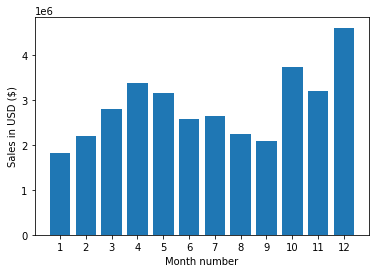

In [22]:
Months = range(1,13)
plt.bar(Months,sales_per_month["Sales"])
plt.xticks(Months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")
plt.show()

#December(12th) month was the best month for sale and  earned 4613443.34$

### 2. What city had the highest number of sales?

In [61]:
sales_per_city = df1.groupby("City + State").sum()
sales_per_city

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
City + State,,,,,,
Atlanta GA 30301,16602,2779908.20,104794,2795498.58,214264,442932
Austin TX 73301,11153,1809873.61,69829,1819581.75,141946,289060
Boston MA 02215,22528,3637409.77,141112,3661642.01,288225,590442
Dallas TX 75001,16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles CA 90001,33289,5421435.23,208325,5452570.80,427444,866638
New York City NY 10001,27932,4635370.83,175741,4664317.43,357696,733598
Portland ME 04101,2750,447189.25,17144,449758.27,35211,72856
Portland OR 97035,11303,1860558.22,70621,1870732.34,144421,295533
San Francisco CA 94016,50239,8211461.74,315520,8262203.91,643265,1319477


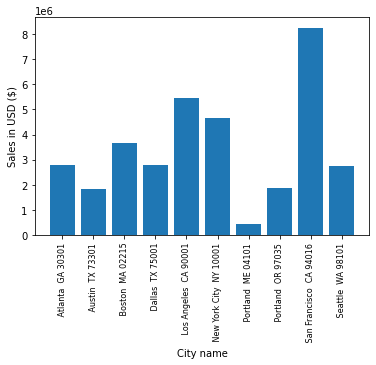

In [62]:
Cities = [city for city, df in df1.groupby("City + State")]

plt.bar(Cities,sales_per_city["Sales"])
plt.xticks(Cities, rotation="vertical",size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City name")
plt.show()

# San Francisco CA 94016 city with 8262203.91$  had the highest number of sales 

### 3. What time should we display advertisements to maximize likelihood of customer's buying products?  

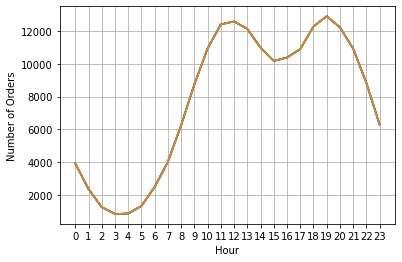

In [37]:
hours = [hour for hour, df in df1.groupby("Hour")]

plt.plot(hours,df1.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

# my recommendation is around 11am-12pm or 7pm time we should  display advertisements to maximize likelihood of customer's buying products

### 4. What products are most often sold together? 

In [49]:
df2 = df1[df1["Order ID"].duplicated(keep=False)]

df2["Grouped"] = df2.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

df2 = df2[["Order ID", "Grouped"]].drop_duplicates()

df2.head()

C:\Users\user\AppData\Local\Temp/ipykernel_7604/3415284852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Grouped"] = df2.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [52]:
from itertools import combinations
from collections import Counter

Count = Counter()

for row in df2["Grouped"]:
    row_list = row.split(',')
    Count.update(Counter(combinations(row_list,2)))
    
for key, value in Count.most_common(10):
    print(key, value)
    
#('iPhone', 'Lightning Charging Cable') 1005 are the products most often sold together

# Referenced: http://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### 5. What product sold the most? Why do you think it sold the most?

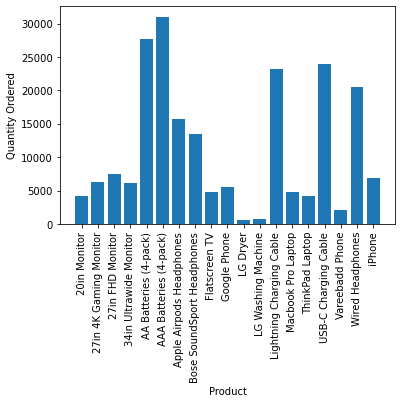

In [58]:
Product_Group = df1.groupby("Product")
Quantity_Ordered = Product_Group.sum()["Quantity Ordered"]

products = [product for product, df in Product_Group]

plt.bar(products, Quantity_Ordered)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.xticks(products, rotation="vertical", size=10)
plt.show()

# product sold the most are AAA Batteries(4-pack),AA Batteries(4-pack),USB-C Charging cable,etc

C:\Users\user\AppData\Local\Temp/ipykernel_7604/2895726887.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation="vertical", size=10)


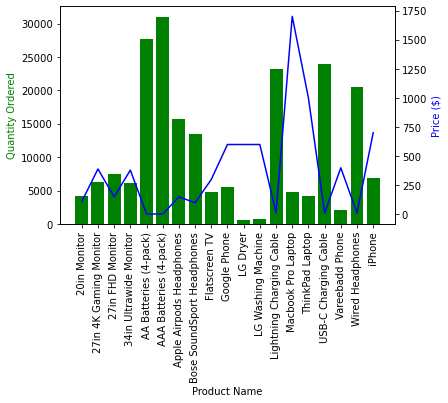

In [60]:
prices = df1.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, Quantity_Ordered, color="g")
ax2.plot(products, prices, color="b")

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Ordered", color="g")
ax2.set_ylabel("Price ($)", color="b")
ax1.set_xticklabels(products, rotation="vertical", size=10)

plt.show()

# I think AAA Batteries(4-pack),AA Batteries(4-pack),USB-C Charging cable,etc 
# products sold the most because of their low prices.